In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
# импорт модулей
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [ ]:
# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split
# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 10000,
train_size = 60000,
random_state = 613)

In [ ]:
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)


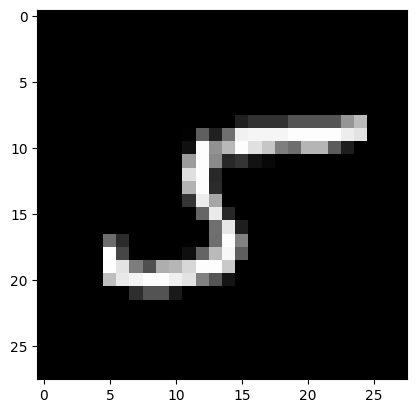

5


In [ ]:
# вывод изображения
plt.imshow(X_train[613], cmap=plt.get_cmap('gray'))
plt.show()
# вывод метки для этого изображения
print(y_train[613])

In [ ]:
# развернем каждое изображение 28*28 в вектор 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)

Shape of transformed X train: (60000, 784)


In [ ]:
# переведем метки в one-hot
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]

Shape of transformed y train: (60000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# 1. создаем модель - объявляем ее объектом класса Sequential
model = Sequential()
# 2. добавляем первый скрытый слой
model.add(Dense(units=300, input_dim=num_pixels, activation='sigmoid'))
# 3. добавляем второй скрытый слой
model.add(Dense(units=100, activation='sigmoid'))
# 4. добавляем выходной слой
model.add(Dense(units=num_classes, activation='softmax'))
# 5. компилируем модель
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# вывод информации об архитектуре модели
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Обучаем модель
H = model.fit(X_train, y_train, validation_split=0.1, epochs=100)

Epoch 1/100
1688/1688 [==============================] - 13s 8ms/step - loss: 2.1476 - accuracy: 0.3866 - val_loss: 1.9238 - val_accuracy: 0.5923
Epoch 2/100
1688/1688 [==============================] - 11s 6ms/step - loss: 1.5720 - accuracy: 0.6643 - val_loss: 1.2212 - val_accuracy: 0.7220
Epoch 3/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.9835 - accuracy: 0.7788 - val_loss: 0.8027 - val_accuracy: 0.8123
Epoch 4/100
1688/1688 [==============================] - 11s 7ms/step - loss: 0.7028 - accuracy: 0.8308 - val_loss: 0.6229 - val_accuracy: 0.8430
Epoch 5/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5712 - accuracy: 0.8567 - val_loss: 0.5268 - val_accuracy: 0.8625
Epoch 6/100
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4968 - accuracy: 0.8711 - val_loss: 0.4695 - val_accuracy: 0.8763
Epoch 7/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4493 - accuracy: 0.8804 - val_loss: 0.4319 - va

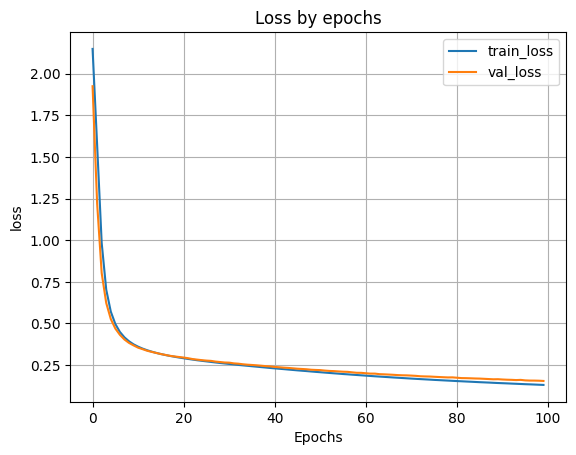

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.1605 - accuracy: 0.9516
Loss on test data: 0.16045494377613068
Accuracy on test data: 0.9516000151634216


1/1 [==============================] - 0s 101ms/step
NN output: [[9.7971731e-01 1.7821254e-06 3.2410023e-04 1.5236597e-04 2.6423812e-05
  9.0748044e-03 1.0614152e-02 3.3289296e-05 3.6912468e-05 1.8956602e-05]]


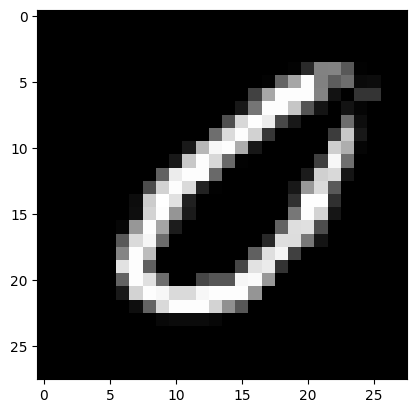

Real mark:  0
NN answer:  0


In [ ]:
# вывод тестового изображения и результата распознавания
n = 123
result = model.predict(X_test[n:n+1])
print('NN output:', result)
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))

In [ ]:
# загрузка собственного изображения
from PIL import Image
file_data = Image.open('Лаба1.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)

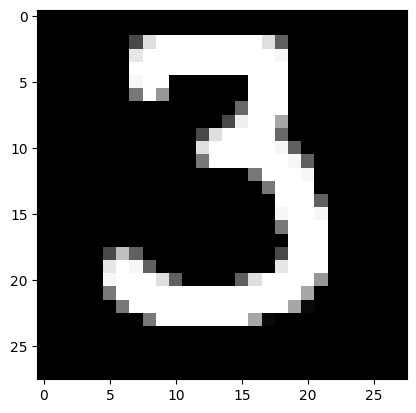

1/1 [==============================] - 0s 38ms/step
I think it's  3


In [ ]:
# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)
# распознавание
result = model.predict(test_img)
print('I think it\'s ', np.argmax(result))